In [2]:
import numpy as pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1214]:
train_df=pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')

In [1216]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22291 entries, 0 to 22290
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      22291 non-null  object 
 1   Order Date    22291 non-null  object 
 2   Country       22291 non-null  object 
 3   City          22291 non-null  object 
 4   State         22291 non-null  object 
 5   Category      22291 non-null  object 
 6   Product Name  22291 non-null  object 
 7   Quantity      22291 non-null  int64  
 8   Profit        22291 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ MB


In [1218]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      200 non-null    object 
 1   Order Date    200 non-null    object 
 2   Country       200 non-null    object 
 3   City          200 non-null    object 
 4   State         200 non-null    object 
 5   Category      200 non-null    object 
 6   Product Name  200 non-null    object 
 7   Quantity      200 non-null    int64  
 8   Profit        0 non-null      float64
dtypes: float64(1), int64(1), object(7)
memory usage: 14.2+ KB


In [1220]:
train_df["is_train"] = True
test_df["is_train"] = False

In [1222]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)

In [1224]:
combined_df['Order Date'] = combined_df['Order Date'].astype(str).str.replace('-', '/').str.strip()
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], dayfirst=True, errors='coerce')
combined_df['Order Date']

0       2015-04-26
1       2015-04-26
2       2015-04-26
3       2015-04-27
4       2015-04-27
           ...    
22486   2025-04-24
22487   2025-04-24
22488   2025-04-24
22489   2025-04-25
22490   2025-04-25
Name: Order Date, Length: 22491, dtype: datetime64[ns]

In [1226]:
combined_df[['Order_State', 'Order_Year', 'Order_Number']] = combined_df['Order ID'].str.split('-', expand=True)
combined_df['Order_Year'] = combined_df['Order_Year'].astype(int)
combined_df['Order_Number'] = combined_df['Order_Number'].astype(int)

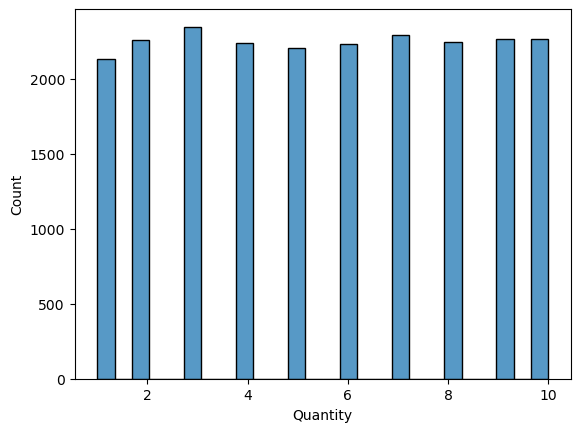

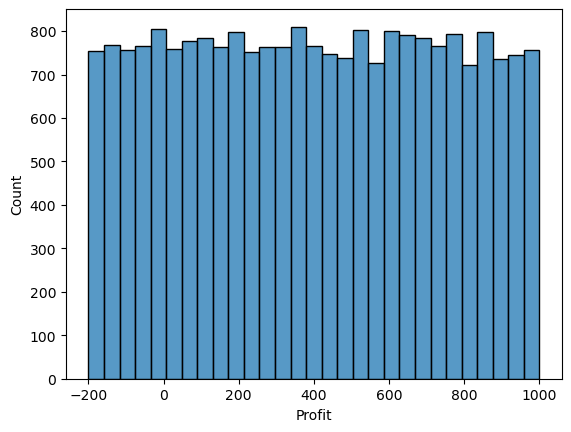

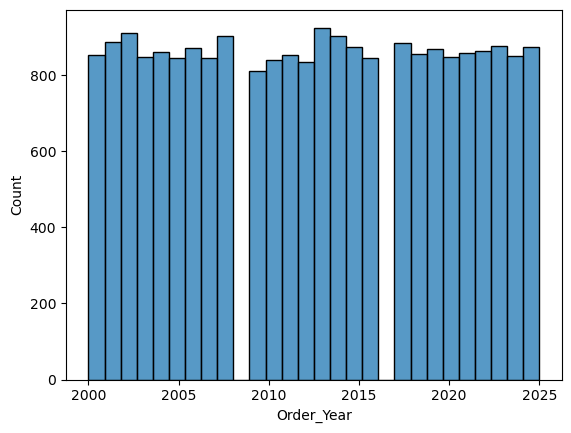

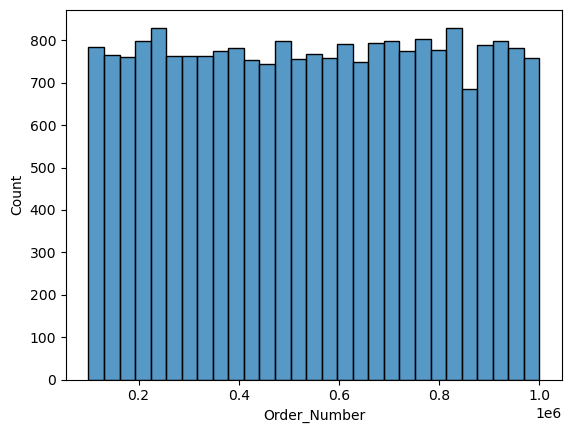

In [1228]:
num_col=combined_df.select_dtypes(include=np.number).columns
for i in num_col:
    sns.histplot(combined_df[i])
    plt.show()

In [1230]:
#combined_df.drop('State',axis=True,inplace=True)
#combined_df.drop('Country',axis=1,inplace=True)

In [1232]:
st = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

# Example to map order ID states to full names:
combined_df['Order_State'] = combined_df['Order_State'].map(st)


In [1234]:
combined_df

,Order ID,Order Date,Country,City,State,Category,Product Name,Quantity,Profit,is_train,Order_State,Order_Year,Order_Number
0,NM-2012-343889,2015-04-26,United States,Lambertfurt,Florida,Furnishings,Table Lamp,3,391.61,True,New Mexico,2012,343889
1,VA-2022-163003,2015-04-26,United States,West Jennifer,Nevada,Labels,Address Labels,3,579.75,True,Virginia,2022,163003
2,KS-2015-985001,2015-04-26,United States,West Melvinborough,Florida,Labels,Address Labels,3,-118.06,True,Kansas,2015,985001
3,WI-2014-993323,2015-04-27,United States,Jensenfurt,Florida,Storage,Vertical Stackable Tray,8,854.52,True,Wisconsin,2014,993323
4,MO-2006-118786,2015-04-27,United States,West Adam,California,Accessories,Inkjet Printer Ink,6,167.34,True,Missouri,2006,118786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,IN-2017-505490,2025-04-24,United States,Port Jeffport,Texas,Copiers,HP LaserJet Pro,9,NaN,False,Indiana,2017,505490
22487,IL-2021-399146,2025-04-24,United States,South Chris,Georgia,Accessories,Stapler,1,NaN,False,Illinois,2021,399146
22488,AL-2016-828750,2025-04-24,United States,South Tony,Illinois,Labels,Address Labels,9,NaN,False,Alabama,2016,828750
22489,NE-2009-636048,2025-04-25,United States,North Jose,Georgia,Accessories,Calculator,3,NaN,False,Nebraska,2009,636048


In [1236]:
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia', 'District of Columbia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
}

def map_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

combined_df['Region'] = combined_df['Order_State'].apply(map_region)

In [1238]:
combined_df

,Order ID,Order Date,Country,City,State,Category,Product Name,Quantity,Profit,is_train,Order_State,Order_Year,Order_Number,Region
0,NM-2012-343889,2015-04-26,United States,Lambertfurt,Florida,Furnishings,Table Lamp,3,391.61,True,New Mexico,2012,343889,West
1,VA-2022-163003,2015-04-26,United States,West Jennifer,Nevada,Labels,Address Labels,3,579.75,True,Virginia,2022,163003,South
2,KS-2015-985001,2015-04-26,United States,West Melvinborough,Florida,Labels,Address Labels,3,-118.06,True,Kansas,2015,985001,Midwest
3,WI-2014-993323,2015-04-27,United States,Jensenfurt,Florida,Storage,Vertical Stackable Tray,8,854.52,True,Wisconsin,2014,993323,Midwest
4,MO-2006-118786,2015-04-27,United States,West Adam,California,Accessories,Inkjet Printer Ink,6,167.34,True,Missouri,2006,118786,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,IN-2017-505490,2025-04-24,United States,Port Jeffport,Texas,Copiers,HP LaserJet Pro,9,NaN,False,Indiana,2017,505490,Midwest
22487,IL-2021-399146,2025-04-24,United States,South Chris,Georgia,Accessories,Stapler,1,NaN,False,Illinois,2021,399146,Midwest
22488,AL-2016-828750,2025-04-24,United States,South Tony,Illinois,Labels,Address Labels,9,NaN,False,Alabama,2016,828750,South
22489,NE-2009-636048,2025-04-25,United States,North Jose,Georgia,Accessories,Calculator,3,NaN,False,Nebraska,2009,636048,Midwest


<Axes: xlabel='Region', ylabel='Profit'>

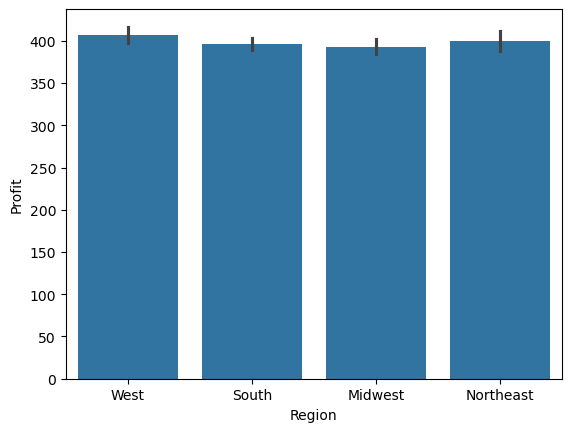

In [1240]:
sns.barplot(data=combined_df,x='Region',y='Profit')

In [1242]:
combined_df['Order_State'].nunique()

51

In [1244]:
combined_df.drop('State',axis=1,inplace=True)

In [1246]:
combined_df.duplicated().sum()

0

In [1248]:
combined_df.describe()

,Order Date,Quantity,Profit,Order_Year,Order_Number
count,22491,22491.000000,22291.000000,22491.000000,22491.000000
mean,2020-04-22 16:33:48.331332608,5.521053,398.797705,2012.496643,550026.934952
min,2015-04-26 00:00:00,1.000000,-199.890000,2000.000000,100009.000000
25%,2017-10-20 00:00:00,3.000000,99.450000,2006.000000,323303.000000
50%,2020-04-23 00:00:00,6.000000,396.440000,2013.000000,550697.000000
75%,2022-10-20 00:00:00,8.000000,696.150000,2019.000000,774050.500000
max,2025-04-25 00:00:00,10.000000,999.970000,2025.000000,999996.000000
std,NaN,2.864921,345.353033,7.507123,260102.970751


<Axes: xlabel='Quantity', ylabel='Profit'>

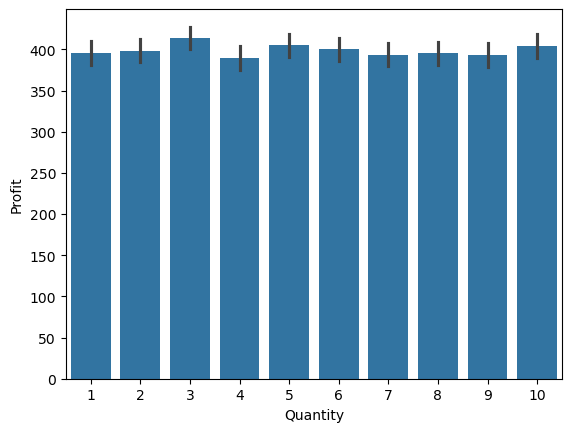

In [1250]:
sns.barplot(x=train_df['Quantity'],y=train_df['Profit'])

In [1174]:
#combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce', dayfirst=True)

In [1252]:
combined_df['Order Year'] = combined_df['Order Date'].dt.year

In [1254]:
combined_df['Order Month'] = combined_df['Order Date'].dt.month
combined_df['Order Day'] = combined_df['Order Date'].dt.day
combined_df['Order Weekday'] = combined_df['Order Date'].dt.weekday

In [1256]:
combined_df

,Order ID,Order Date,Country,City,Category,Product Name,Quantity,Profit,is_train,Order_State,Order_Year,Order_Number,Region,Order Year,Order Month,Order Day,Order Weekday
0,NM-2012-343889,2015-04-26,United States,Lambertfurt,Furnishings,Table Lamp,3,391.61,True,New Mexico,2012,343889,West,2015,4,26,6
1,VA-2022-163003,2015-04-26,United States,West Jennifer,Labels,Address Labels,3,579.75,True,Virginia,2022,163003,South,2015,4,26,6
2,KS-2015-985001,2015-04-26,United States,West Melvinborough,Labels,Address Labels,3,-118.06,True,Kansas,2015,985001,Midwest,2015,4,26,6
3,WI-2014-993323,2015-04-27,United States,Jensenfurt,Storage,Vertical Stackable Tray,8,854.52,True,Wisconsin,2014,993323,Midwest,2015,4,27,0
4,MO-2006-118786,2015-04-27,United States,West Adam,Accessories,Inkjet Printer Ink,6,167.34,True,Missouri,2006,118786,Midwest,2015,4,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,IN-2017-505490,2025-04-24,United States,Port Jeffport,Copiers,HP LaserJet Pro,9,NaN,False,Indiana,2017,505490,Midwest,2025,4,24,3
22487,IL-2021-399146,2025-04-24,United States,South Chris,Accessories,Stapler,1,NaN,False,Illinois,2021,399146,Midwest,2025,4,24,3
22488,AL-2016-828750,2025-04-24,United States,South Tony,Labels,Address Labels,9,NaN,False,Alabama,2016,828750,South,2025,4,24,3
22489,NE-2009-636048,2025-04-25,United States,North Jose,Accessories,Calculator,3,NaN,False,Nebraska,2009,636048,Midwest,2025,4,25,4


In [1258]:
combined_df.drop('Order_Year',axis=1,inplace=True)

<Axes: xlabel='Category', ylabel='Profit'>

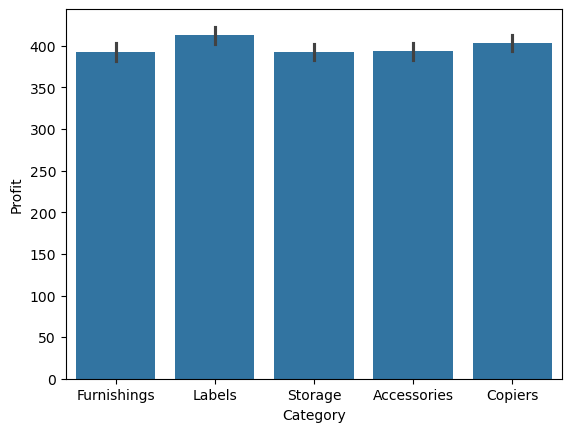

In [1260]:
sns.barplot(x=train_df['Category'],y=train_df['Profit'])

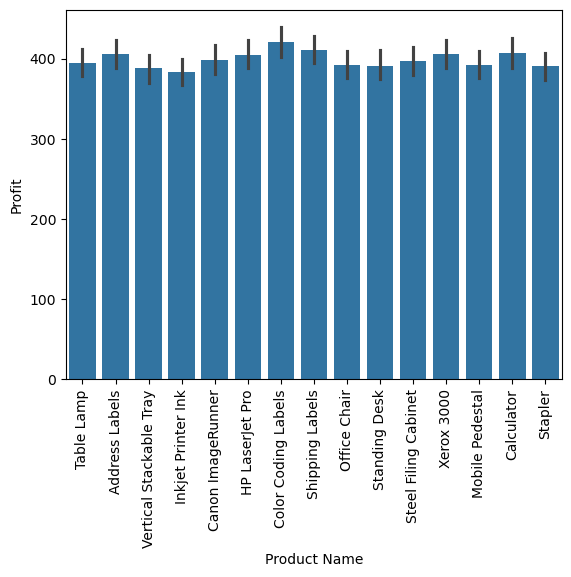

In [1262]:
sns.barplot(x=train_df['Product Name'],y=train_df['Profit'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Order Date', ylabel='Profit'>

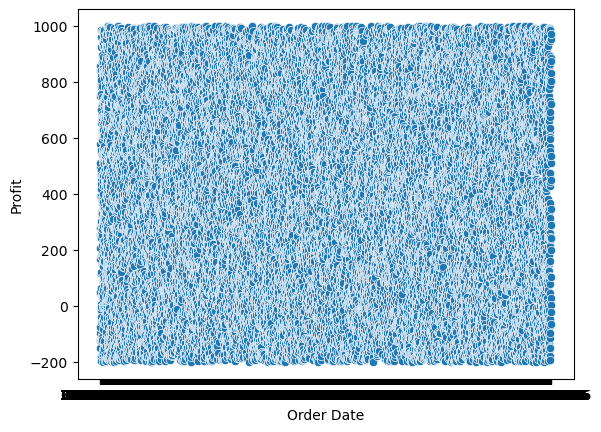

In [1264]:
sns.scatterplot(x=train_df['Order Date'],y=train_df['Profit'])

In [1265]:
combined_df.drop(['Country','Order Date'],axis=1,inplace=True)

In [1266]:
combined_df

,Order ID,City,Category,Product Name,Quantity,Profit,is_train,Order_State,Order_Number,Region,Order Year,Order Month,Order Day,Order Weekday
0,NM-2012-343889,Lambertfurt,Furnishings,Table Lamp,3,391.61,True,New Mexico,343889,West,2015,4,26,6
1,VA-2022-163003,West Jennifer,Labels,Address Labels,3,579.75,True,Virginia,163003,South,2015,4,26,6
2,KS-2015-985001,West Melvinborough,Labels,Address Labels,3,-118.06,True,Kansas,985001,Midwest,2015,4,26,6
3,WI-2014-993323,Jensenfurt,Storage,Vertical Stackable Tray,8,854.52,True,Wisconsin,993323,Midwest,2015,4,27,0
4,MO-2006-118786,West Adam,Accessories,Inkjet Printer Ink,6,167.34,True,Missouri,118786,Midwest,2015,4,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,IN-2017-505490,Port Jeffport,Copiers,HP LaserJet Pro,9,NaN,False,Indiana,505490,Midwest,2025,4,24,3
22487,IL-2021-399146,South Chris,Accessories,Stapler,1,NaN,False,Illinois,399146,Midwest,2025,4,24,3
22488,AL-2016-828750,South Tony,Labels,Address Labels,9,NaN,False,Alabama,828750,South,2025,4,24,3
22489,NE-2009-636048,North Jose,Accessories,Calculator,3,NaN,False,Nebraska,636048,Midwest,2025,4,25,4


<Axes: >

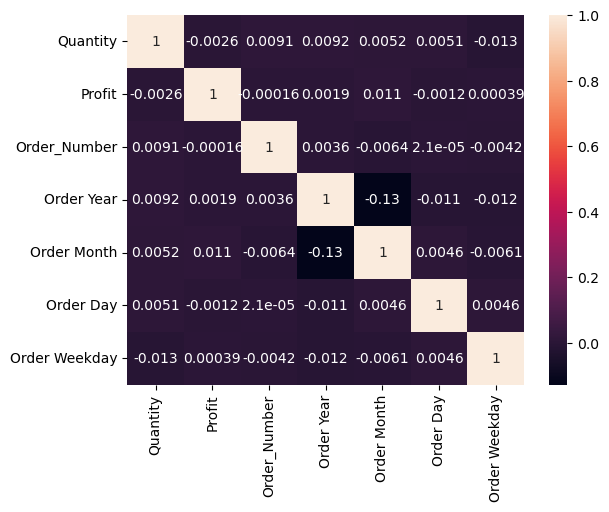

In [1267]:
sns.heatmap(combined_df.select_dtypes(include=np.number).corr(),annot=True)

<Axes: xlabel='Order Month', ylabel='Count'>

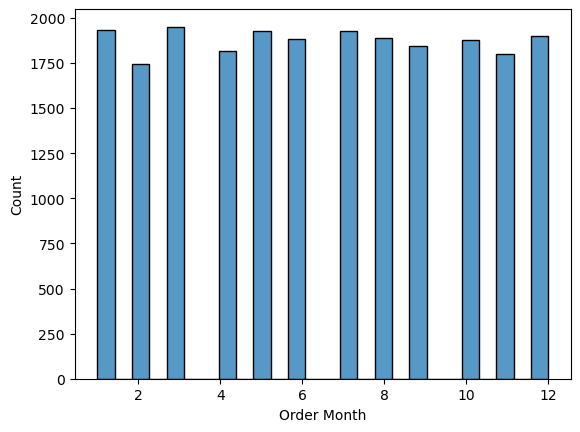

In [1272]:
sns.histplot(combined_df['Order Month'])

In [1274]:
combined_df.drop(['Order ID','City','Order_Number'],axis=True,inplace=True)
combined_df.drop('Order_State',axis=True,inplace=True)

In [1276]:
from sklearn.preprocessing import PowerTransformer
yt=PowerTransformer(method='yeo-johnson')
combined_df['Order Month'] = yt.fit_transform(combined_df[['Order Month']])

<Axes: >

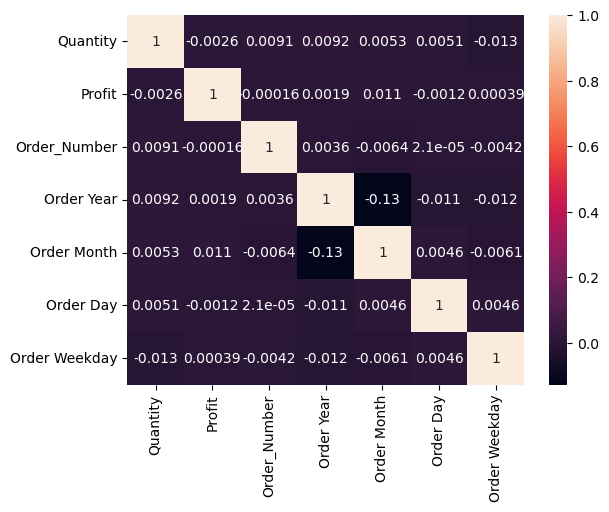

In [1212]:
sns.heatmap(combined_df.select_dtypes(include=np.number).corr(),annot=True)

In [977]:
combined_df

,Category,Product Name,Quantity,Profit,is_train,Region,Order Year,Order Month,Order Day,Order Weekday
0,Furnishings,Table Lamp,3,391.61,True,West,2015,4,26,6
1,Labels,Address Labels,3,579.75,True,South,2015,4,26,6
2,Labels,Address Labels,3,-118.06,True,Midwest,2015,4,26,6
3,Storage,Vertical Stackable Tray,8,854.52,True,Midwest,2015,4,27,0
4,Accessories,Inkjet Printer Ink,6,167.34,True,Midwest,2015,4,27,0
...,...,...,...,...,...,...,...,...,...,...
22486,Copiers,HP LaserJet Pro,9,NaN,False,Midwest,2025,4,24,3
22487,Accessories,Stapler,1,NaN,False,Midwest,2025,4,24,3
22488,Labels,Address Labels,9,NaN,False,South,2025,4,24,3
22489,Accessories,Calculator,3,NaN,False,Midwest,2025,4,25,4


In [979]:
for i in combined_df.select_dtypes(include=object):
    print(f'{i}',combined_df[i].nunique())

Category 5
Product Name 15
Region 4


In [981]:
combined_df=pd.get_dummies(combined_df, columns=['Category', 'Region'], drop_first=True,dtype=int)

In [983]:
combined_df

,Product Name,Quantity,Profit,is_train,Order Year,Order Month,Order Day,Order Weekday,Category_Copiers,Category_Furnishings,Category_Labels,Category_Storage,Region_Northeast,Region_South,Region_West
0,Table Lamp,3,391.61,True,2015,4,26,6,0,1,0,0,0,0,1
1,Address Labels,3,579.75,True,2015,4,26,6,0,0,1,0,0,1,0
2,Address Labels,3,-118.06,True,2015,4,26,6,0,0,1,0,0,0,0
3,Vertical Stackable Tray,8,854.52,True,2015,4,27,0,0,0,0,1,0,0,0
4,Inkjet Printer Ink,6,167.34,True,2015,4,27,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,HP LaserJet Pro,9,NaN,False,2025,4,24,3,1,0,0,0,0,0,0
22487,Stapler,1,NaN,False,2025,4,24,3,0,0,0,0,0,0,0
22488,Address Labels,9,NaN,False,2025,4,24,3,0,0,1,0,0,1,0
22489,Calculator,3,NaN,False,2025,4,25,4,0,0,0,0,0,0,0


In [985]:
combined_df['Product Name']=combined_df['Product Name'].map(combined_df['Product Name'].value_counts(normalize=True))

In [987]:
combined_df

,Product Name,Quantity,Profit,is_train,Order Year,Order Month,Order Day,Order Weekday,Category_Copiers,Category_Furnishings,Category_Labels,Category_Storage,Region_Northeast,Region_South,Region_West
0,0.065804,3,391.61,True,2015,4,26,6,0,1,0,0,0,0,1
1,0.065626,3,579.75,True,2015,4,26,6,0,0,1,0,0,1,0
2,0.065626,3,-118.06,True,2015,4,26,6,0,0,1,0,0,0,0
3,0.068250,8,854.52,True,2015,4,27,0,0,0,0,1,0,0,0
4,0.068828,6,167.34,True,2015,4,27,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,0.065137,9,NaN,False,2025,4,24,3,1,0,0,0,0,0,0
22487,0.065626,1,NaN,False,2025,4,24,3,0,0,0,0,0,0,0
22488,0.065626,9,NaN,False,2025,4,24,3,0,0,1,0,0,1,0
22489,0.065048,3,NaN,False,2025,4,25,4,0,0,0,0,0,0,0


In [990]:
combined_df

,Product Name,Quantity,Profit,is_train,Order Year,Order Month,Order Day,Order Weekday,Category_Copiers,Category_Furnishings,Category_Labels,Category_Storage,Region_Northeast,Region_South,Region_West
0,0.065804,3,391.61,True,2015,4,26,6,0,1,0,0,0,0,1
1,0.065626,3,579.75,True,2015,4,26,6,0,0,1,0,0,1,0
2,0.065626,3,-118.06,True,2015,4,26,6,0,0,1,0,0,0,0
3,0.068250,8,854.52,True,2015,4,27,0,0,0,0,1,0,0,0
4,0.068828,6,167.34,True,2015,4,27,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,0.065137,9,NaN,False,2025,4,24,3,1,0,0,0,0,0,0
22487,0.065626,1,NaN,False,2025,4,24,3,0,0,0,0,0,0,0
22488,0.065626,9,NaN,False,2025,4,24,3,0,0,1,0,0,1,0
22489,0.065048,3,NaN,False,2025,4,25,4,0,0,0,0,0,0,0


In [992]:
train_df = combined_df[combined_df["is_train"] == True].drop(columns=["is_train"])
test_df = combined_df[combined_df["is_train"] == False].drop(columns=["is_train"])

In [994]:
train_df

,Product Name,Quantity,Profit,Order Year,Order Month,Order Day,Order Weekday,Category_Copiers,Category_Furnishings,Category_Labels,Category_Storage,Region_Northeast,Region_South,Region_West
0,0.065804,3,391.61,2015,4,26,6,0,1,0,0,0,0,1
1,0.065626,3,579.75,2015,4,26,6,0,0,1,0,0,1,0
2,0.065626,3,-118.06,2015,4,26,6,0,0,1,0,0,0,0
3,0.068250,8,854.52,2015,4,27,0,0,0,0,1,0,0,0
4,0.068828,6,167.34,2015,4,27,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22286,0.064070,5,971.32,2025,3,21,4,0,0,1,0,0,0,0
22287,0.065137,6,804.74,2025,3,21,4,1,0,0,0,0,1,0
22288,0.065626,3,242.42,2025,3,21,4,0,0,1,0,0,1,0
22289,0.065626,4,287.97,2025,3,22,5,0,0,1,0,0,1,0


In [996]:
test_df

,Product Name,Quantity,Profit,Order Year,Order Month,Order Day,Order Weekday,Category_Copiers,Category_Furnishings,Category_Labels,Category_Storage,Region_Northeast,Region_South,Region_West
22291,0.066427,3,NaN,2025,3,23,6,1,0,0,0,0,0,0
22292,0.066071,7,NaN,2025,3,23,6,0,0,1,0,0,0,1
22293,0.065626,4,NaN,2025,3,23,6,0,0,1,0,0,0,0
22294,0.071051,10,NaN,2025,3,23,6,0,0,0,1,0,0,1
22295,0.068828,5,NaN,2025,3,23,6,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22486,0.065137,9,NaN,2025,4,24,3,1,0,0,0,0,0,0
22487,0.065626,1,NaN,2025,4,24,3,0,0,0,0,0,0,0
22488,0.065626,9,NaN,2025,4,24,3,0,0,1,0,0,1,0
22489,0.065048,3,NaN,2025,4,25,4,0,0,0,0,0,0,0


In [1078]:
X = train_df.drop(["Profit",'Order Year','Order Day','Order Weekday'],axis=1)
y = train_df["Profit"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [1080]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on train and transform train/val
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [1082]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluate
mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation RMSE: {np.sqrt(mse)}")

<IPython.core.display.Javascript object>

Validation RMSE: 348.4924933885197


In [1084]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                Feature        VIF
0          Product Name  15.349585
1              Quantity   4.703858
2           Order Month   4.563114
8          Region_South   2.440697
6      Category_Storage   2.139904
9           Region_West   2.056258
4  Category_Furnishings   1.997996
3      Category_Copiers   1.961488
5       Category_Labels   1.944991
7      Region_Northeast   1.729462


In [1086]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('ridge', Ridge())
    
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
print("Best RMSE (CV):", -grid.best_score_)

# Predict on validation
y_val_pred = grid.predict(X_val)

Best alpha: {'ridge__alpha': 100}
Best RMSE (CV): 344.59692536641643


In [1088]:
from sklearn.linear_model import Lasso

lasso_pipe = Pipeline([
    ('lasso', Lasso(max_iter=10000))
])

lasso_params = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]
}

lasso_grid = GridSearchCV(lasso_pipe, lasso_params, scoring='neg_root_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso RMSE:", -lasso_grid.best_score_)

Best Lasso alpha: {'lasso__alpha': 1}
Best Lasso RMSE: 344.57374460757


In [1121]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
elastic = ElasticNet()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],        # regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]   # balance between Lasso (1.0) and Ridge (0.0)
}

# Set up grid search
grid = GridSearchCV(estimator=elastic, param_grid=param_grid, 
                    scoring='neg_root_mean_squared_error', cv=5)

# Fit on training data
grid.fit(X_train_scaled, y_train)

# Best model and performance
print("Best Params:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

# Predict on test data
y_pred = grid.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Test RMSE:", rmse)

Best Params: {'alpha': 1.0, 'l1_ratio': 0.1}
Best RMSE: 344.55177720742364
Test RMSE: 349.09526290448173


C:\Users\Aasif\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


<Axes: ylabel='Count'>

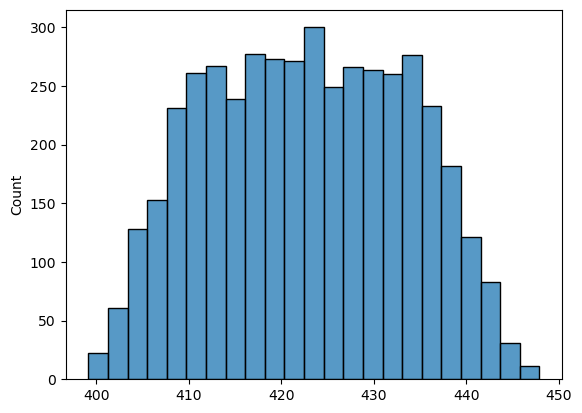

In [1123]:
sns.histplot(y_pred)

In [1125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create polynomial features up to degree 2
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)

C:\Users\Aasif\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [1127]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Test RMSE:", rmse)

Test RMSE: 465.76454695565445


In [1133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1.0))
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_val)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Regularized Polynomial Regression RMSE:", rmse)

Regularized Polynomial Regression RMSE: 348.4465398569973


In [1102]:
x_test=test_df.drop(["Profit",'Order Year','Order Day','Order Weekday'],axis=1)

In [1104]:
x_test=scaler.fit_transform(x_test)

In [1106]:
lasso=Lasso(alpha=1)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=1)

In [1108]:
y_pred=lasso.predict(x_test)

In [1110]:
y_pred

array([385.99143613, 406.76540811, 394.07694508, 389.40300525,
       378.510461  , 394.04361929, 380.73434241, 411.38253263,
       388.64984265, 380.54779043, 389.6759896 , 399.70592683,
       393.01759162, 399.08618839, 401.17897809, 398.4507023 ,
       381.36861257, 394.0942965 , 382.93020274, 387.18353793,
       385.57664939, 393.73975988, 378.01994216, 392.44350608,
       401.26326061, 408.14597239, 378.86499761, 386.66718357,
       393.33454606, 384.95435181, 396.0349642 , 381.79795226,
       402.04312252, 392.25827748, 395.68042759, 393.37212824,
       383.65809801, 381.93261111, 392.19410461, 379.75929944,
       393.01333524, 387.97409521, 386.28572262, 396.60443208,
       382.8615621 , 383.67260176, 397.27092681, 384.47971376,
       379.19945072, 404.09955353, 386.16808635, 385.58862197,
       393.14348243, 386.35829728, 409.47502165, 410.37570956,
       391.01626274, 406.16802646, 392.46773499, 389.75333473,
       401.40938218, 385.64922405, 400.0620244 , 409.87

In [1112]:
predictions_df = pd.DataFrame({'Profit': y_pred})

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)